In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Training.csv')


#### 1

In [ ]:

import pandas as pd
import numpy as np

data = pd.read_csv("Training.csv")

cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

print("Informasi Data:")
print(data.info())
print("\nStatistik Deskriptif:")
print(data.describe())


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   float64
 2   BloodPressure             2460 non-null   float64
 3   SkinThickness             2460 non-null   float64
 4   Insulin                   2460 non-null   float64
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 173.1 KB
None

Statistik Deskriptif:
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2460.000000  2460.000000    2460.000000    2460.000000  2460.000000   
mean      3.817480   122.410569      

### 2
Data tersebut terdiri dari 2.460 baris dan dengan 9 kolom, kolom nya tidak memiliki nilai kosong (Non-Null). maka tidak ada data yang hilang.
Tipe data yang digunakan float64 dan int64, yang cocok untuk analisis ini karena semua variabel bersifat numerik.

Deskripsi Statistik

Pregnancies: Rata-rata jumlah kehamilan adalah sekitar 3,8, dengan rentang dari 0 hingga 17. Hal ini menunjukkan variasi jumlah kehamilan di antara pasien, yang bisa relevan dalam analisis risiko diabetes.

Glucose: Rata-rata kadar glukosa adalah 122,41, dengan nilai terendah 44 dan tertinggi 197. Karena kadar glukosa yang tinggi merupakan salah satu indikator utama diabetes, distribusi data glukosa ini penting untuk dianalisis lebih lanjut.

BloodPressure: Tekanan darah rata-rata adalah 72,25, dengan rentang antara 30 hingga 122. Terdapat variasi yang cukup besar dalam tekanan darah, yang dapat menjadi faktor risiko kesehatan.

SkinThickness: Rata-rata ketebalan kulit adalah 29,28, dengan nilai minimum 7 dan maksimum 63. Nilai rendah (jika ada 0) mungkin menunjukkan data yang tidak tercatat dengan baik atau tidak tersedia.
Insulin: Rata-rata kadar insulin adalah 137,73, dengan rentang dari 14 hingga 846. Tingkat insulin yang tinggi bisa mengindikasikan resistensi insulin, yang relevan dengan kondisi diabetes.

BMI: Rata-rata Indeks Massa Tubuh (BMI) adalah 32,40, dengan rentang antara 18 hingga 67. Nilai BMI yang tinggi dapat menunjukkan risiko yang lebih besar terhadap diabetes.

DiabetesPedigreeFunction: Rata-rata skor silsilah diabetes adalah 0,49, dengan rentang dari 0,08 hingga 2,42, yang menunjukkan kemungkinan pengaruh keturunan dalam risiko diabetes.

Age: Rata-rata usia dalam dataset ini adalah 32,82, dengan rentang dari 21 hingga 81 tahun. Rentang usia ini meliputi dewasa muda hingga lanjut usia, yang memungkinkan analisis risiko diabetes pada berbagai kelompok usia.

Outcome: Variabel ini merupakan label target (0 = tidak diabetes, 1 = diabetes) dengan rata-rata 0,39, yang berarti sekitar 39% data memiliki label positif untuk diabetes.

Proses Preprocessing yang Dibutuhkan

Karena setiap kolom memiliki rentang nilai yang berbeda, seperti Glucose, BloodPressure, dan BMI, normalisasi atau standarisasi diperlukan agar algoritma berbasis jarak seperti K-Nearest Neighbors (KNN) dapat bekerja optimal.

Pengisian Nilai Nol: Kolom seperti SkinThickness dan Insulin memiliki nilai rendah yang bisa jadi adalah data yang tidak tersedia. Nilai nol dalam kolom-kolom ini mungkin perlu diisi dengan nilai median atau rata-rata agar data menjadi lebih akurat.

#### 3

Saving Training.csv to Training (2).csv

Model: K-Nearest Neighbors
Confusion Matrix:


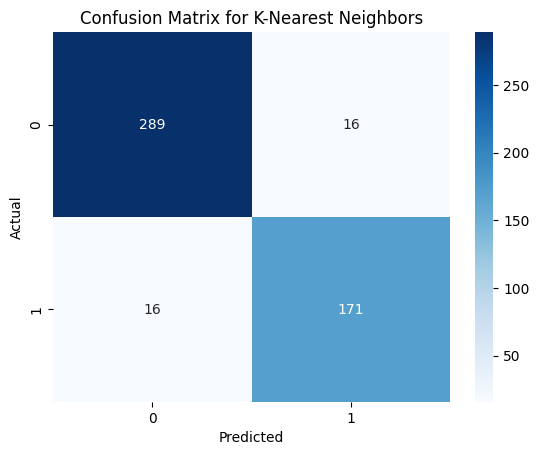

Accuracy: 0.93
Precision: 0.91
Recall: 0.91

Model: Decision Tree
Confusion Matrix:


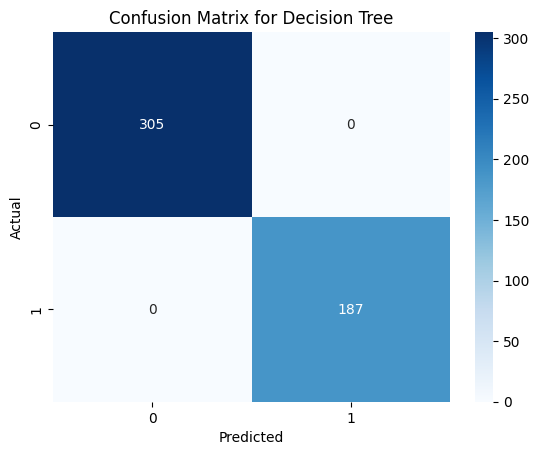

Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Model: Naive Bayes
Confusion Matrix:


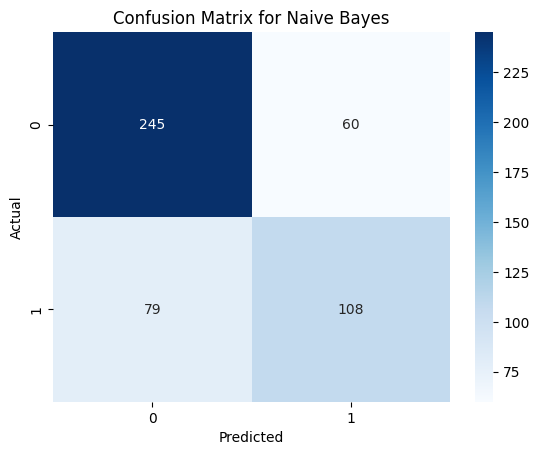

Accuracy: 0.72
Precision: 0.64
Recall: 0.58


In [11]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("Training.csv")

X = data.drop(columns="Outcome")
y = data["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")


evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_nb, "Naive Bayes")


### 4


Model: K-Nearest Neighbors
Confusion Matrix:


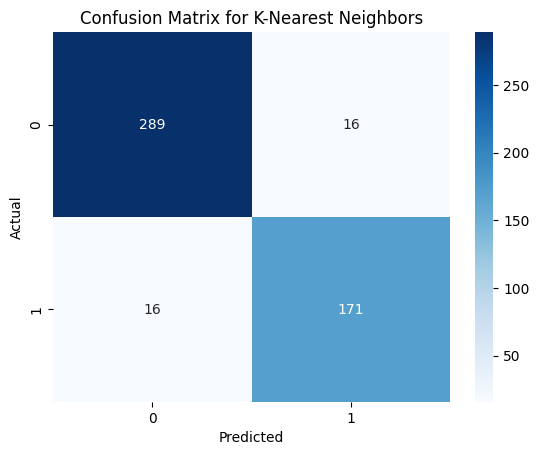

Accuracy: 0.93
Precision: 0.91
Recall: 0.91

Model: Decision Tree
Confusion Matrix:


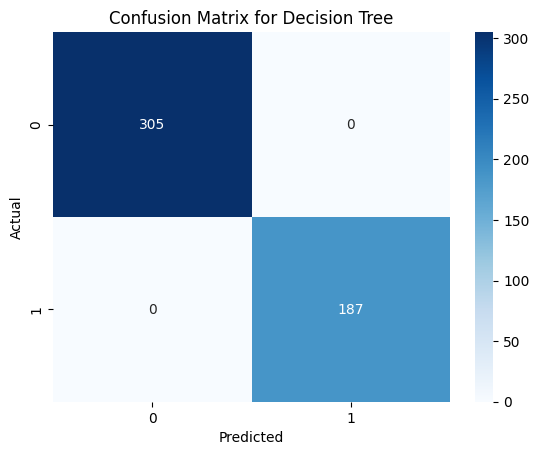

Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Model: Naive Bayes
Confusion Matrix:


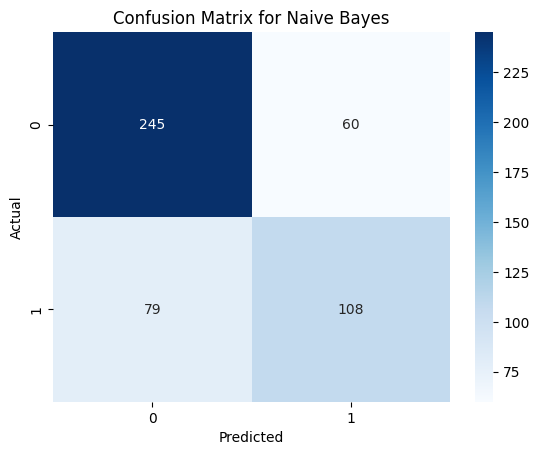

Accuracy: 0.72
Precision: 0.64
Recall: 0.58

=== Kesimpulan Kinerja Model ===
KNN - Accuracy: 0.93, Precision: 0.91, Recall: 0.91
Decision Tree - Accuracy: 1.00, Precision: 1.00, Recall: 1.00
Naive Bayes - Accuracy: 0.72, Precision: 0.64, Recall: 0.58

Model terbaik berdasarkan accuracy adalah: Decision Tree


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    return accuracy, precision, recall

accuracy_knn, precision_knn, recall_knn = evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
accuracy_dt, precision_dt, recall_dt = evaluate_model(y_test, y_pred_dt, "Decision Tree")
accuracy_nb, precision_nb, recall_nb = evaluate_model(y_test, y_pred_nb, "Naive Bayes")

print("\n=== Kesimpulan Kinerja Model ===")
print(f"KNN - Accuracy: {accuracy_knn:.2f}, Precision: {precision_knn:.2f}, Recall: {recall_knn:.2f}")
print(f"Decision Tree - Accuracy: {accuracy_dt:.2f}, Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f}")
print(f"Naive Bayes - Accuracy: {accuracy_nb:.2f}, Precision: {precision_nb:.2f}, Recall: {recall_nb:.2f}")

if accuracy_knn > accuracy_dt and accuracy_knn > accuracy_nb:
    best_model = "K-Nearest Neighbors"
elif accuracy_dt > accuracy_knn and accuracy_dt > accuracy_nb:
    best_model = "Decision Tree"
else:
    best_model = "Naive Bayes"

print(f"\nModel terbaik berdasarkan accuracy adalah: {best_model}")
